# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Brandt Green

EID: bwg537

Name: Bret Jaco

EID: bcj646

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:
a) The mathematical representation above is the difference between the expected value of the estimator at the test point $x_0$ and the true value at that point. This difference is the bias of the estimator.

b) The tradeoff between bias and variance relates to the complexity of the model. Simple models will have high bias and low variance because though they are unable to fit to each data point as well, they also don't change much when different samples of data are used. More complex models are able to more accurately fit each data point but will vary much more depending on the sample of data they are fitted to.

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [230]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns; sns.set_theme()
# matplotlib.rcParams['figure.figsize'] = (14, 8)

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-5,5,101).reshape(-1,1)


In [231]:

matplotlib.rcParams['figure.figsize'] = (14, 10)
def plot_curves(x_train, y_train, x_test, y_test, data_size):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  fig, ax = plt.subplots()
  ax.set_title(f"Bias-Variance Exploration for data size {data_size}")
  ax.scatter(x_train,y_train,label='x_train')
  ax.scatter(x_test, y_test,label='x_test')
  

  degrees = [2,4,7]
  train_mses = {}
  test_mses = {}

  for degree in degrees:
    transformed_x_train = np.vander(np.squeeze(x_train), degree + 1)[:,:-1] # This indexing at the end is so we don't include intercept term in x_vals
    transformed_x_test = np.vander(np.squeeze(x_test), degree + 1)[:,:-1]

    lin_model = LinearRegression()
    lin_model.fit(transformed_x_train, y_train)
    train_mses[degree] = mean_squared_error(lin_model.predict(transformed_x_train),y_train)**.5
    test_mses[degree] = mean_squared_error(lin_model.predict(transformed_x_test),y_test)**.5
    
    print(f'\n------Model Degree: {degree} ---------')
    print(f'The train mse for degree {degree} = {train_mses[degree]}')
    print(f'The test mse for degree {degree} = {test_mses[degree]}')    
    
    # Now plot predictions versus x_all
    transformed_x_all = np.vander(np.squeeze(x_all), degree + 1)[:,:-1]
    ax.plot(x_all, lin_model.predict(transformed_x_all),label=f'x_all predicted for Degree: {degree}')

    # Plot predictions for test set
    ax.scatter(x_test, lin_model.predict(transformed_x_test), label=f'x_test predicted for Degree: {degree}')
  

  ax.legend()
  return [train_mses[2],train_mses[4],train_mses[7]], [test_mses[2],test_mses[4],test_mses[7]]



------Model Degree: 2 ---------
The train mse for degree 2 = 15.725673212098595
The test mse for degree 2 = 17.890334917764356

------Model Degree: 4 ---------
The train mse for degree 4 = 5.63205273921419
The test mse for degree 4 = 5.593932685205168

------Model Degree: 7 ---------
The train mse for degree 7 = 5.538699630067487
The test mse for degree 7 = 5.7801984462205205


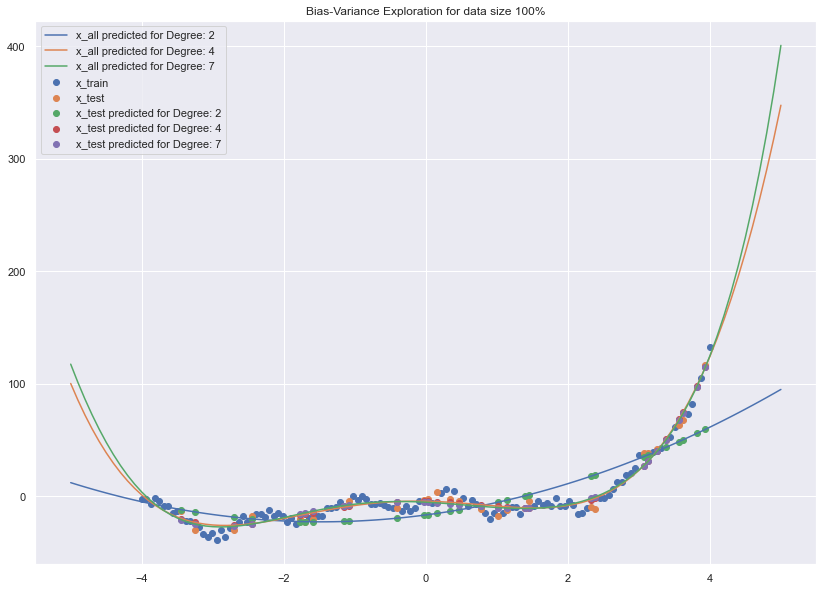

In [232]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test, '100%')

The 4th degree polynomial model gives the best performance on the test data set, which is the relevant criteria for comparing the models. This model fits the sweet spot in between the other two models in regards to bias and variance. The model with the second degree does not perform as well as the others, because of a high bias - the specified functional form does not accurately capture the patterns in the data, hence the high mse on both test and training data sets. In contrast, the 7th degree polynomial model does not perform as well because of a variance issue. The model has the best training set performance, but we can see that it is overfitting the data as its test mse jumps up above the 4th degree. The 4th degree polynomial model appears to have sufficient complexity to capture the patterns in the data, but is not so complex that it fails in out of sample testing.

20% data

------Model Degree: 2 ---------
The train mse for degree 2 = 12.69533275610767
The test mse for degree 2 = 20.057994089886673

------Model Degree: 4 ---------
The train mse for degree 4 = 5.925800632752488
The test mse for degree 4 = 6.191990389482437

------Model Degree: 7 ---------
The train mse for degree 7 = 4.748046618492005
The test mse for degree 7 = 11.627882234851283
40% data

------Model Degree: 2 ---------
The train mse for degree 2 = 12.261015979960922
The test mse for degree 2 = 20.14460639877726

------Model Degree: 4 ---------
The train mse for degree 4 = 5.623569119913696
The test mse for degree 4 = 5.758843890850613

------Model Degree: 7 ---------
The train mse for degree 7 = 5.049031466692759
The test mse for degree 7 = 7.825434099493192
60% data

------Model Degree: 2 ---------
The train mse for degree 2 = 12.250870891141465
The test mse for degree 2 = 20.081119950922577

------Model Degree: 4 ---------
The train mse for degree 4 = 5.4030367146585165
The t

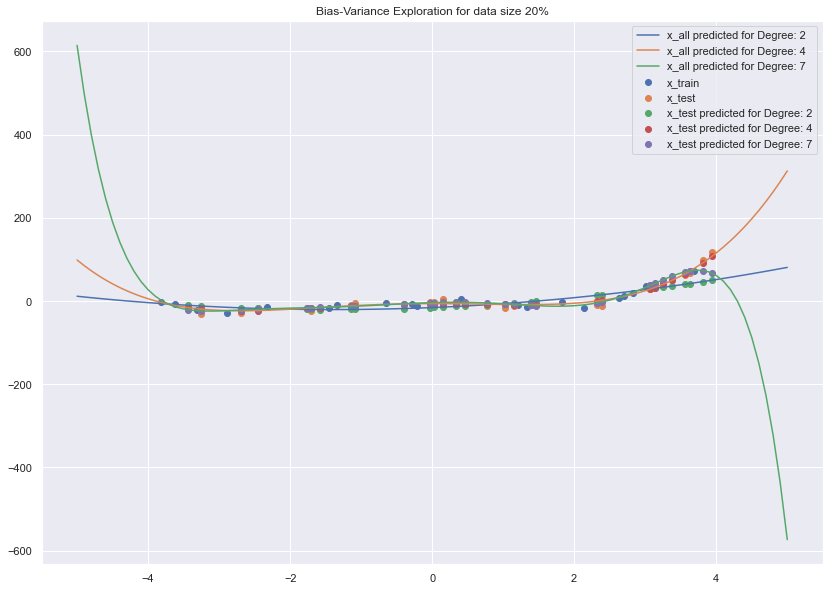

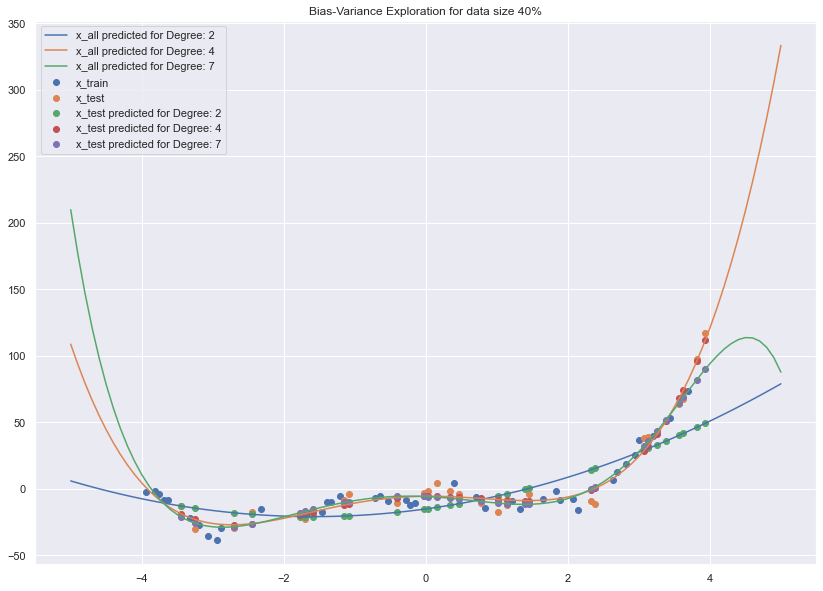

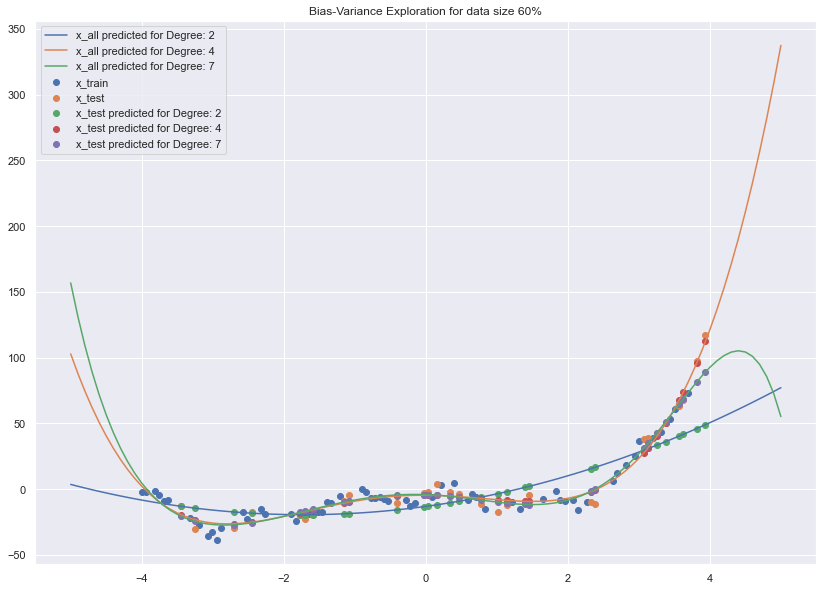

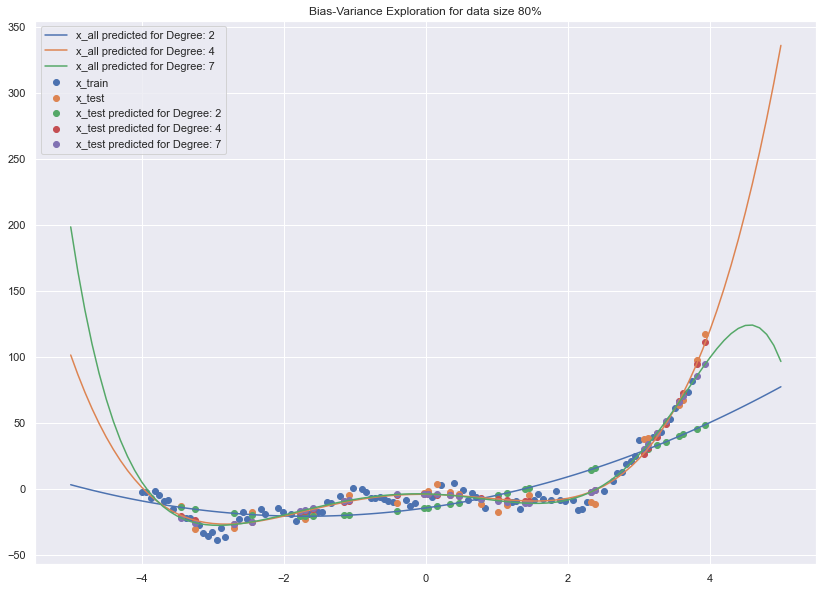

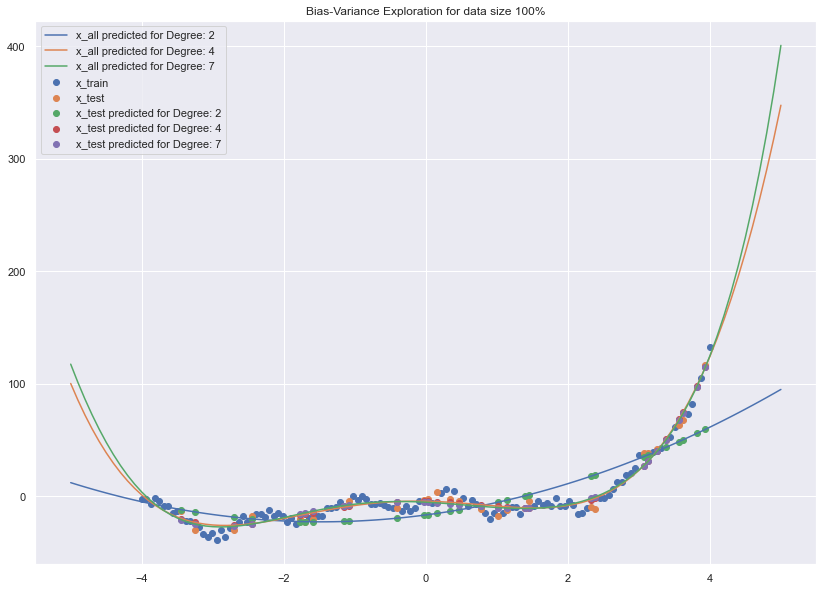

In [233]:
df = pd.DataFrame(index=[20,40,60,80,100], columns=['deg_2_train','deg_4_train','deg_7_train','deg_2_test','deg_4_test','deg_7_test'])

print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test, '20%')
df.loc[20,['deg_2_train','deg_4_train','deg_7_train']] = train_rmses_20
df.loc[20,['deg_2_test','deg_4_test','deg_7_test']] = test_rmses_20

print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test, '40%')
df.loc[40,['deg_2_train','deg_4_train','deg_7_train']] = train_rmses_40
df.loc[40,['deg_2_test','deg_4_test','deg_7_test']] = test_rmses_40


print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test, '60%')
df.loc[60,['deg_2_train','deg_4_train','deg_7_train']] = train_rmses_60
df.loc[60,['deg_2_test','deg_4_test','deg_7_test']] = test_rmses_60


print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test, '80%')
df.loc[80,['deg_2_train','deg_4_train','deg_7_train']] = train_rmses_80
df.loc[80,['deg_2_test','deg_4_test','deg_7_test']] = test_rmses_80


print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test, '100%')
df.loc[100,['deg_2_train','deg_4_train','deg_7_train']] = train_rmses_100
df.loc[100,['deg_2_test','deg_4_test','deg_7_test']] = test_rmses_100


The first thing we notice is that for small sizes of training data set size, the most complex model with degree 7 performs quite poorly for out of sample data. With such few data points to learn from, the model overfits extremely, resulting in a model with high variance. What is interesting to note, is how this variance issue decreases as the data set size is increased. This again confirms what we already know, that adding more data does indeed reduce model variance. We again see the bias problem displayed in the trends for model degree two, it starts off with an extremely unimppressive rmse and adding more data does not improve the error much. This shows us that for a poorly specified model, increasing data size will not help reduce your error, and you will need to find a better model that can reduce the bias. Last, we observe the errors for the 4th degree model which we have already identified as being correct. Here, the error for training and test data are low and because the model complexity is about where it should be, we see little improvement from increasing the data size.

## Answer:

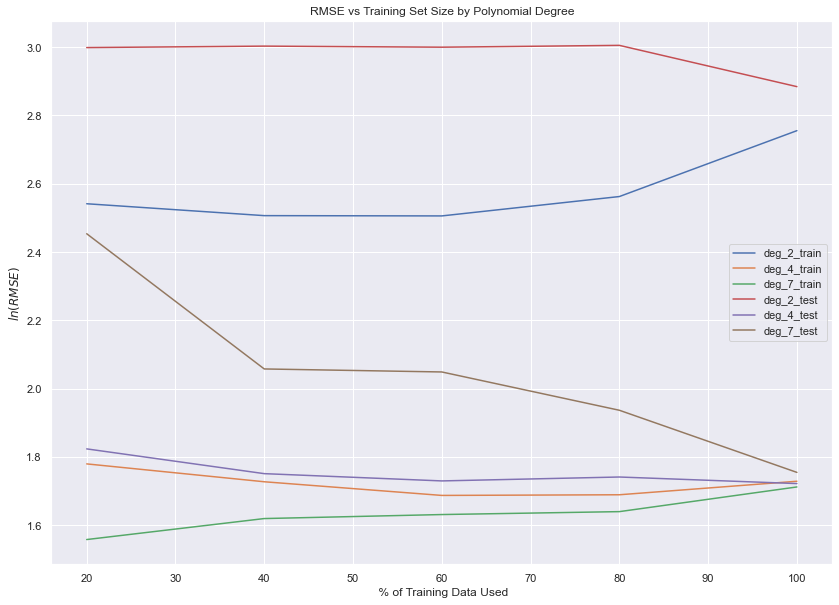

In [234]:
df_ln = df.copy()
df_ln = df.applymap(np.log)
df_ln.plot()
plt.xlabel(f' % of Training Data Used')
plt.ylabel('$ln(RMSE)$')
plt.title('RMSE vs Training Set Size by Polynomial Degree');

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:
a) Both gradient descent (GD) and stochastic gradient descent (SGD) seek to minimize a cost function by iteratively updating a set of parameters. However, in GD, the full training set is used for calculations at each iteration which is very slow and computationally expensive for large datasets. Advantages to GD include it scaling well with the number of features and being able to find the optimal solution if given time to converge. Instead of adjusting the parameters based on the entire training set, SGD only uses a random instance of the data at each iteration. This makes it much faster for large datasets and less computationaly expensive. In addition, SGD can more easily escape shallow local minima. A disadvantge to SGD is that it gives a good solution but not the optimal solution.

b) The Nelder-Mead method is a direct search optimization method that continually adjusts its step size based off the loss of the new point. If the point yields a lower loss than any point before it, the step size increases to accelarate towards the bottom. If the new point is worse, the step size contracts in order to converge around the minima. The main downside to the Nelder-Mead method is that it doesn't perform well for higher dimensional functions. Many machine learning models can have thousands of parameters and this method begins to perform poorly at only 12 or so parameters.


# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

We define our coefficient vector as 
$$ W = \begin{bmatrix} w_0 \\  w_1 \\ w_2 \\ w_3 \\ \end{bmatrix}$$

We define our residual value of y as:
$$ r = y - w_0 +w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$


Our loss function as: $L = r^{2}$.

We must calculate the gradient of $L$ to update our initial coefficient weights.

\

We first calculate the partial derivatives of r with respect to the coefficient weights:


$$ dr/dw_0 = 1,\hspace{1cm} dr/dw_1 = x_1,\hspace{1cm} dr/dw_2 = x_1x_2,\hspace{1cm}dr/dw_3 = e^{-x_1}$$
\

We now multiply each partial by $2r$ to find the complete partial derivitive of $L$

$$gradient_{w_0}  = 2r,\hspace{.25cm} gradient_{w_1} = 2rx_1,\hspace{.25cm} gradient_{w_2} = 2rx_1x_2,\hspace{.25cm} gradient_{w_3} = 2r * e^{-x_1}$$

$$ gradient =  \begin{bmatrix} 2r \\  2rx_1 \\ 2rx_1x_2 \\ 2r * e^{-x_1} \end{bmatrix}$$

Now that we have the gradient of L, we update our coefficent weights with the formula:

$$ W - LearnRate * gradient$$

Where LearnRate is a hyperparameter that we choose.

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [235]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate * gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                x_vals = X[i,:] # Get the transformed x values associated with sample
                y_val = y[i] # Get the y value
    
                # Compute error
                error = self.linearPredict(x_vals) - y_val

                # Compute gradient
                gradient = x_vals * error + 2 * self.regularization * self.coef

                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]

        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.title(f'MSE by epoch for learning rate: {self.learning_rate} and Regularization: {self.regularization}')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            plt.title(f'Coefficients by epoch for learning rate: {self.learning_rate} and Regularization: {self.regularization}')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):   
        """returns a vector of y_hat predictions given a matrix of x_values"""

        return np.dot(X, self.coef)    

In [236]:
# Read data and create parameters
data = pd.read_csv('SGD_samples-1.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]


## Answer:

In [237]:
# Now we try out a bunch of different hyperparameters for learning rate and regularization and extract the best two.

best_mse = np.inf
best_alpha, best_learn_rate = 0,0

second_best_mse = np.inf
second_best_alpha, second_best_learn_rate = 0,0

for alpha in regularization:
    for learn_rate in learning_rate:
        my_model = Regression(learning_rate=learn_rate,regularization=alpha,n_epoch=n_epochs)
        my_model.fit(X, y)
        if my_model.lowest_mse < best_mse:
            second_best_mse = best_mse
            second_best_alpha = best_alpha
            second_best_learn_rate = best_learn_rate
            
            best_mse = my_model.lowest_mse 
            best_alpha = alpha
            best_learn_rate = learn_rate
        elif my_model.lowest_mse < second_best_mse:
            second_best_mse = my_model.lowest_mse
            second_best_alpha = alpha
            second_best_learn_rate = learn_rate


<ipython-input-235-b6ba2ddd62e1>:39: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-235-b6ba2ddd62e1>:32: RuntimeWarning: invalid value encountered in multiply
  gradient = x_vals * error + 2 * self.regularization * self.coef
<ipython-input-235-b6ba2ddd62e1>:32: RuntimeWarning: overflow encountered in add
  gradient = x_vals * error + 2 * self.regularization * self.coef
<ipython-input-235-b6ba2ddd62e1>:17: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate * gradient
<ipython-input-235-b6ba2ddd62e1>:32: RuntimeWarning: overflow encountered in multiply
  gradient = x_vals * error + 2 * self.regularization * self.coef
<ipython-input-235-b6ba2ddd62e1>:17: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - self.learning_rate * gradient


## Best Model Plot

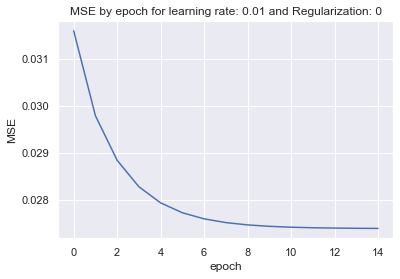

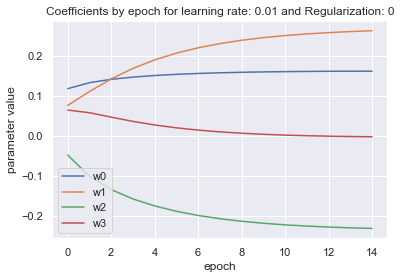

In [238]:
my_model_best = Regression(learning_rate=best_learn_rate, regularization=best_alpha,n_epoch=n_epochs)
my_model_best.fit(X, y,plot=True)

## Second Best Model Plot

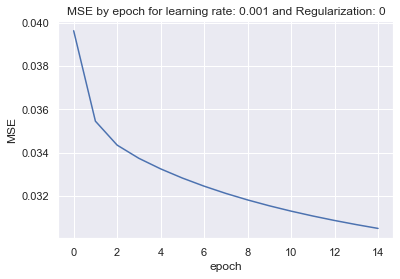

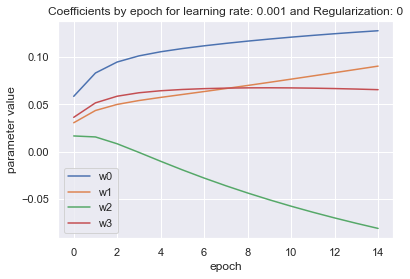

In [239]:
my_model_second_best = Regression(learning_rate=second_best_learn_rate, regularization=second_best_alpha,n_epoch=n_epochs)
my_model_second_best.fit(X, y,plot=True)

In [240]:
print(f'For the best mse of {best_mse} the learning rate was: {best_learn_rate} and the regularization constant was {best_alpha}')
print(f'For the second-best mse of {second_best_mse} the learning rate was: {second_best_learn_rate} and the regularization constant was {second_best_alpha}')

For the best mse of 0.02739108757520101 the learning rate was: 0.01 and the regularization constant was 0
For the second-best mse of 0.03049599152007352 the learning rate was: 0.001 and the regularization constant was 0
